# Water Quality Potability
Louis Mayco D. W. / 1906379296 <br>
dataset : https://www.kaggle.com/adityakadiwal/water-potability?select=water_potability.csv 

Data Description:
- pH       : pH of water 
- Hardness : capacity of water to precipitate soap in mg/L
- Solids   : total dissolved solids in ppm
- Chloramines : ammount of chloramines in ppm
- Sulfate: ampunt of sulfates dissolved in mg/L
- Conductivity : Electrical conductivity of water in uS/cm
- Organic_carbon: ammount of organic carbon in ppm
- Trihalomethanes: Amount of Trihalomethanes in μg/L.
- Turbidity: Measure of light emiting property of water in NTU.
- Potability: Indicates if water is safe for human consumption. Potable :1 and Not potable :0

#0. Import library


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Pre-processing

## 1.1 Dataset

In [9]:
url = 'https://raw.githubusercontent.com/louis-not/Water_Quality_Potability/main/water_potability.csv' 
df = pd.read_csv(url)

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
# dataset size
df.shape

(3276, 10)

In [24]:
# dataset data type
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [15]:
# Statistical Properties of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [23]:
# check null dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## 1.2 Impute Missing Values

### 1.2.1 pH

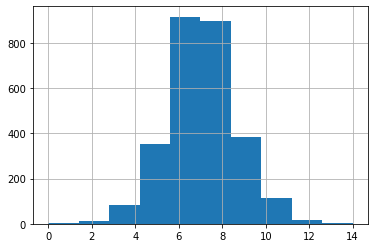

In [26]:
df['ph'].hist()

In [28]:
# based on the distribution type we would use median to impute pH
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['ph']])
df[['ph']] = imputer.transform(df[['ph']])
df[['ph']].isna().sum()

ph    0
dtype: int64

### 1.2.2 sulfate

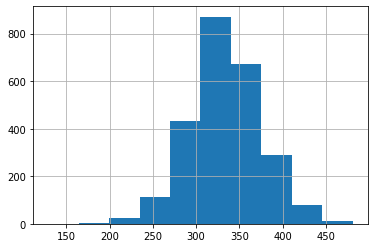

In [30]:
df['Sulfate'].hist()

In [33]:
# based on the distribution type we would use median to impute Sulfate
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['Sulfate']])
df[['Sulfate']] = imputer.transform(df[['Sulfate']])
df[['Sulfate']].isna().sum()

Sulfate    0
dtype: int64

### 1.2.3 Trihalomethanes

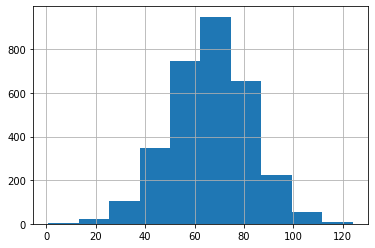

In [32]:
df['Trihalomethanes'].hist()

In [34]:
# based on the distribution type we would use median to impute Trihalomethanes
imputer = SimpleImputer(strategy="median")
imputer.fit(df[['Trihalomethanes']])
df[['Trihalomethanes']] = imputer.transform(df[['Trihalomethanes']])
df[['Trihalomethanes']].isna().sum()

Trihalomethanes    0
dtype: int64

## 1.3 Split Data

In [48]:
X = df.drop(['Potability'], axis = 1)
y = df.Potability

In [49]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
# random_state = 0 --> random seed 
print("Xtrain : ", X_train.shape)
print("Xtest  : ",X_test.shape )
print("ytrain : ", y_train.shape)
print("ytest  : ",y_test.shape )


Xtrain :  (2293, 9)
Xtest  :  (983, 9)
ytrain :  (2293,)
ytest  :  (983,)


## 1.5 Feature Normalization

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##1.6 Principal Component Analysis

In [ ]:
# trans = PCA(n_components=5)

In [ ]:
# X_dim = pd.DataFrame(trans.fit_transform(X))

## 1.7 Outliers

In [64]:
# q1 = X.quantile(0.25)
# q3 = df.quantile(0.75)

# iqr = q3-q1

# lower_bound = q1 - 1.5*iqr
# upper_bound = q3 + 1.5*iqr

In [65]:
# outliers = X[(X>upper_bound)|(X<lower_bound)]
# print(len(outliers))

In [66]:
# X.loc[(X>upper_bound),] = upper_bound
# X.loc[(X<lower_bound),] = lower_bound

#2. Machine Learning Modelling (Decision Tree)

In [71]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       610
           1       0.43      0.43      0.43       373

    accuracy                           0.57       983
   macro avg       0.54      0.54      0.54       983
weighted avg       0.57      0.57      0.57       983



In [75]:
print(confusion_matrix(y_test,y_pred))

[[399 211]
 [212 161]]
